In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("../data/raw/spotify_songs.csv")
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


### Dataset Overview


In [18]:
df.shape

(32833, 23)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
track_popularity,32833.0,42.477081,24.984074,0.000000,24.0000,45.000000,62.00000,100.000
danceability,32833.0,0.654850,0.145085,0.000000,0.5630,0.672000,0.76100,0.983
energy,32833.0,0.698619,0.180910,0.000175,0.5810,0.721000,0.84000,1.000
key,32833.0,5.374471,3.611657,0.000000,2.0000,6.000000,9.00000,11.000
loudness,32833.0,-6.719499,2.988436,-46.448000,-8.1710,-6.166000,-4.64500,1.275
mode,32833.0,0.565711,0.495671,0.000000,0.0000,1.000000,1.00000,1.000
speechiness,32833.0,0.107068,0.101314,0.000000,0.0410,0.062500,0.13200,0.918
acousticness,32833.0,0.175334,0.219633,0.000000,0.0151,0.080400,0.25500,0.994
instrumentalness,32833.0,0.084747,0.224230,0.000000,0.0000,0.000016,0.00483,0.994
liveness,32833.0,0.190176,0.154317,0.000000,0.0927,0.127000,0.24800,0.996


### Null Inspection


In [15]:
df["playlist_subgenre"].unique(), df["playlist_genre"].unique()

(array(['dance pop', 'post-teen pop', 'electropop', 'indie poptimism',
        'hip hop', 'southern hip hop', 'gangster rap', 'trap',
        'album rock', 'classic rock', 'permanent wave', 'hard rock',
        'tropical', 'latin pop', 'reggaeton', 'latin hip hop',
        'urban contemporary', 'hip pop', 'new jack swing', 'neo soul',
        'electro house', 'big room', 'pop edm',
        'progressive electro house'], dtype=object),
 array(['pop', 'rap', 'rock', 'latin', 'r&b', 'edm'], dtype=object))

In [21]:
pd.DataFrame(
    {
        "count": df.shape[0],
        "nulls": df.isnull().sum(),
        "nulls%": df.isnull().mean() * 100,
        "cardinality": df.nunique(),
    }
)

,count,nulls,nulls%,cardinality
track_id,32833,0,0.000000,28356
track_name,32833,5,0.015229,23449
track_artist,32833,5,0.015229,10692
track_popularity,32833,0,0.000000,101
track_album_id,32833,0,0.000000,22545
track_album_name,32833,5,0.015229,19743
track_album_release_date,32833,0,0.000000,4530
playlist_name,32833,0,0.000000,449
playlist_id,32833,0,0.000000,471
playlist_genre,32833,0,0.000000,6


In [22]:
df = df.dropna()
df.isnull().sum().sum()

0

### Duplication Inspection


In [23]:
print(f"There are {df.duplicated().sum()} duplicates.")

There are 0 duplicates.


### Popularity


In [28]:
# Avg popularity by genre
popularity = (
    df.groupby("playlist_genre")["track_popularity"].mean().sort_values(ascending=False)
)
popularity

playlist_genre
pop      47.744870
latin    47.044828
rap      43.238029
rock     41.728338
r&b      41.223532
edm      34.833526
Name: track_popularity, dtype: float64

In [29]:
subgenre_popularity = (
    df.groupby("playlist_subgenre")["track_popularity"]
    .mean()
    .sort_values(ascending=False)
)
subgenre_popularity

playlist_subgenre
post-teen pop                56.825509
permanent wave               54.000905
hip pop                      53.844745
hip hop                      53.773071
reggaeton                    52.925105
dance pop                    52.079353
latin pop                    51.099842
urban contemporary           50.523843
trap                         50.308288
pop edm                      45.686223
latin hip hop                43.477341
tropical                     43.327640
electropop                   42.725142
indie poptimism              42.475478
classic rock                 40.809414
album rock                   38.322066
southern hip hop             36.467742
hard rock                    35.841077
electro house                35.510258
gangster rap                 35.187500
neo soul                     32.687233
big room                     32.282753
new jack swing               28.032657
progressive electro house    26.867883
Name: track_popularity, dtype: float64

C:\Users\emrea\AppData\Local\Temp\ipykernel_4412\1647460580.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_popularity.values, y=top_popularity.index, palette="autumn")


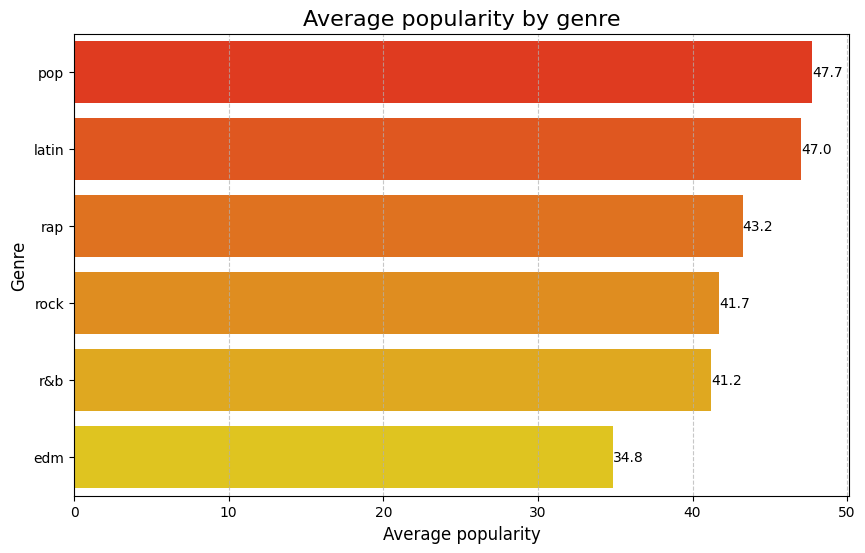

In [30]:
# top 30 most popular genres
top_n = 30
top_popularity = popularity.nlargest(top_n)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_popularity.values, y=top_popularity.index, palette="autumn")

# Adding data labels
for index, value in enumerate(top_popularity.values):
    plt.text(value, index, f"{value:.1f}", va="center", ha="left", color="black")

# Making it more readable
plt.title("Average popularity by genre", fontsize=16)
plt.xlabel("Average popularity", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Gridlines for comparision
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

C:\Users\emrea\AppData\Local\Temp\ipykernel_4412\2351913076.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_popularity.values, y=top_popularity.index, palette="autumn")


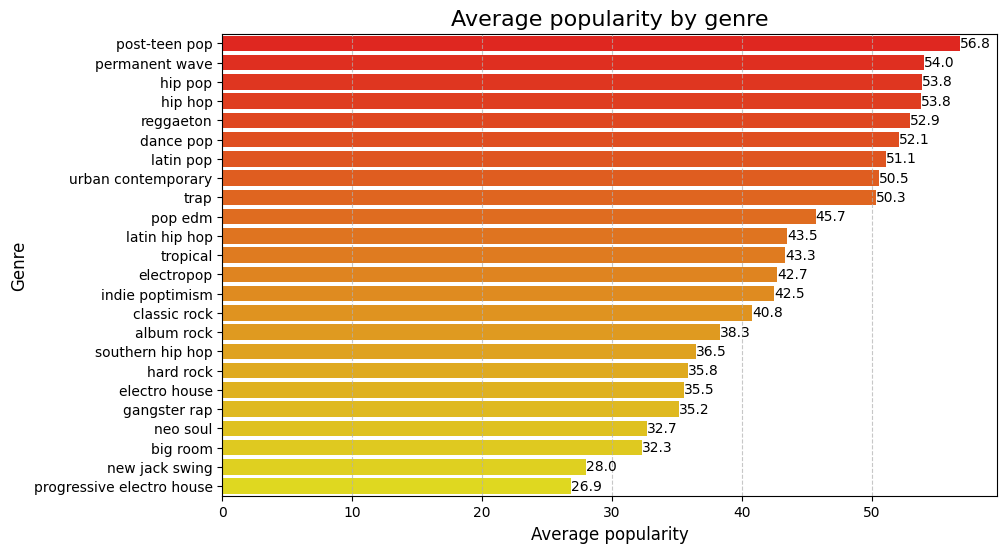

In [31]:
# top 30 most popular genres
top_n = 30
top_popularity = subgenre_popularity.nlargest(top_n)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_popularity.values, y=top_popularity.index, palette="autumn")

# Adding data labels
for index, value in enumerate(top_popularity.values):
    plt.text(value, index, f"{value:.1f}", va="center", ha="left", color="black")

# Making it more readable
plt.title("Average popularity by subgenre", fontsize=16)
plt.xlabel("Average popularity", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Gridlines for comparision
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

In [33]:
genre_counts = df["playlist_genre"].value_counts()
subgenre_counts = df["playlist_subgenre"].value_counts()



print(f"Genre counts: {genre_counts}"), print(f"Subgenre counts: {subgenre_counts}")

Genre counts: playlist_genre
edm      6043
rap      5743
pop      5507
r&b      5431
latin    5153
rock     4951
Name: count, dtype: int64
Subgenre counts: playlist_subgenre
progressive electro house    1809
southern hip hop             1674
indie poptimism              1672
latin hip hop                1655
neo soul                     1637
pop edm                      1517
electro house                1511
hard rock                    1485
gangster rap                 1456
electropop                   1408
urban contemporary           1405
hip hop                      1322
dance pop                    1298
classic rock                 1296
trap                         1291
tropical                     1288
latin pop                    1262
hip pop                      1256
big room                     1206
new jack swing               1133
post-teen pop                1129
permanent wave               1105
album rock                   1065
reggaeton                     948
Name: coun

(None, None)

### Genre counts


C:\Users\emrea\AppData\Local\Temp\ipykernel_4412\478874965.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="autumn")


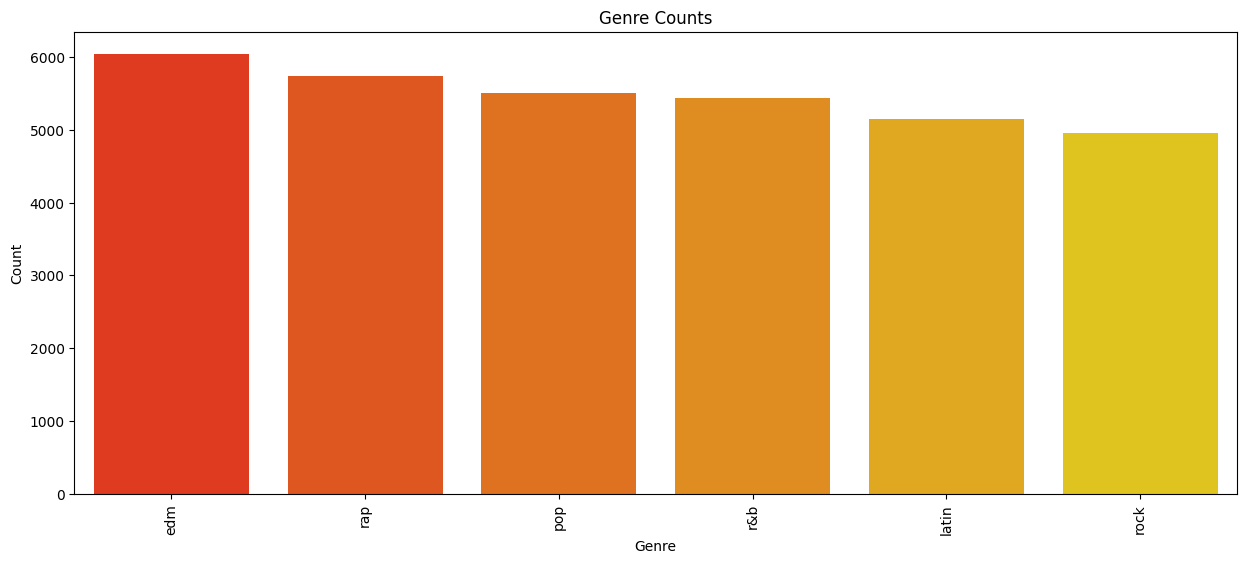

In [35]:
genre_counts = df["playlist_genre"].value_counts()
plt.figure(figsize=(15, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="autumn")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Genre Counts")
plt.xticks(rotation=90)
plt.show()

C:\Users\emrea\AppData\Local\Temp\ipykernel_4412\2282440233.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="autumn")


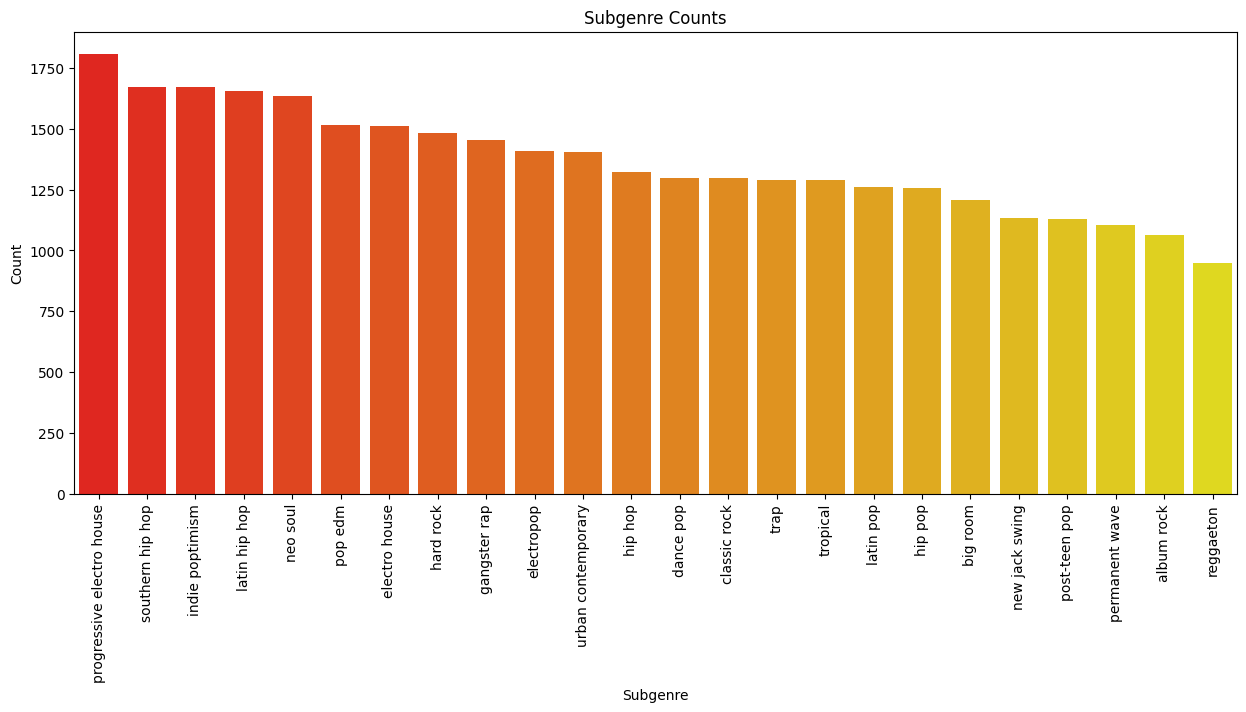

In [37]:
genre_counts = df["playlist_subgenre"].value_counts()
plt.figure(figsize=(15, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="autumn")
plt.xlabel("Subgenre")
plt.ylabel("Count")
plt.title("Subgenre Counts")
plt.xticks(rotation=90)
plt.show()

C:\Users\emrea\AppData\Local\Temp\ipykernel_4412\1089264732.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=key_counts.index, y=key_counts.values, palette="autumn")


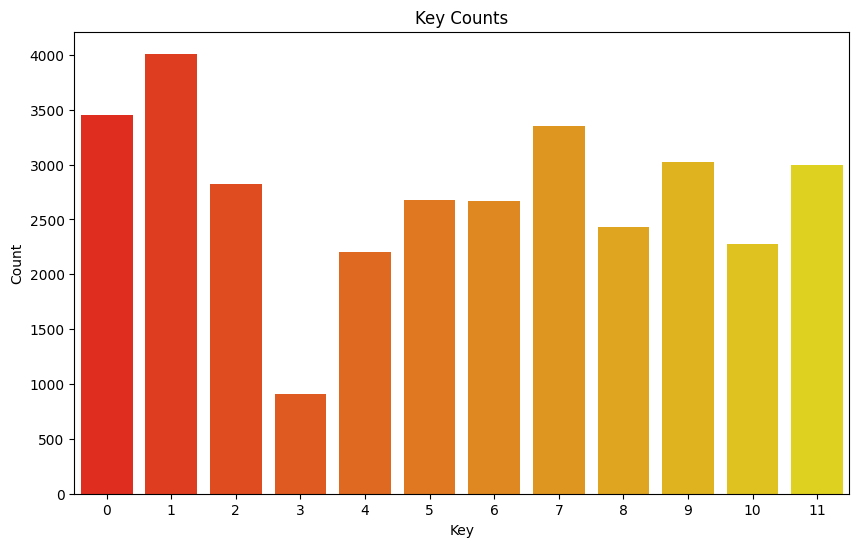

In [39]:
# Key counts
key_counts = df["key"].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=key_counts.index, y=key_counts.values, palette="autumn")
plt.xlabel("Key")
plt.ylabel("Count")
plt.title("Key Counts")
plt.show()

C:\Users\emrea\AppData\Local\Temp\ipykernel_4412\3795416495.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_danceability.index, y=genre_danceability.values, palette="autumn")


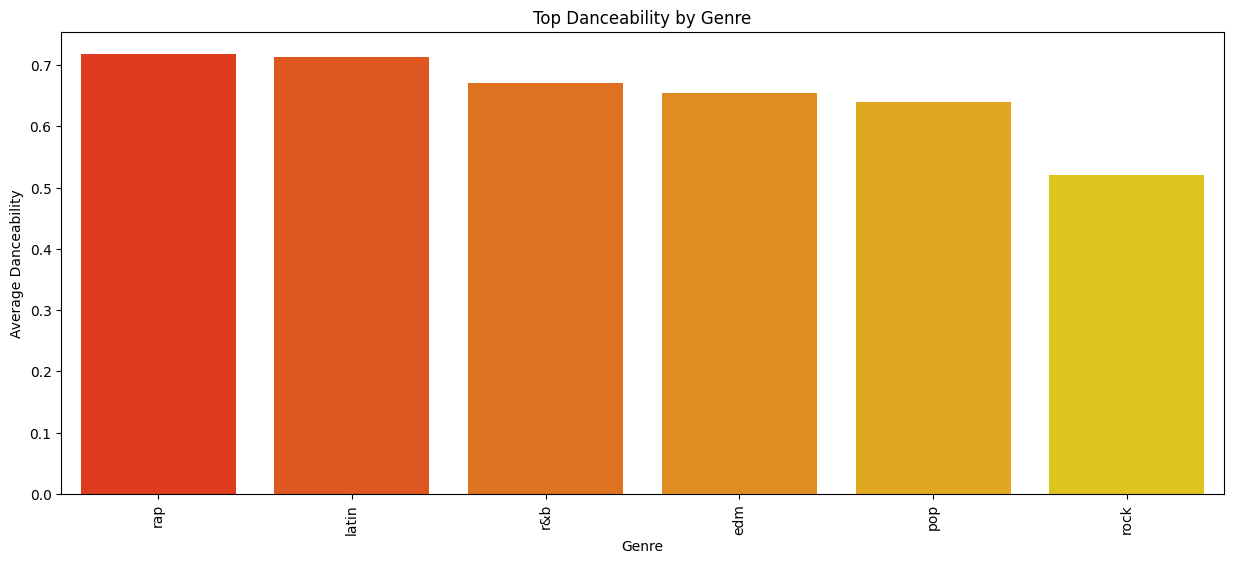

In [40]:
# Danceability by genre
genre_danceability = (
    df.groupby("playlist_genre")["danceability"].mean().sort_values(ascending=False)
)

plt.figure(figsize=(15, 6))
sns.barplot(x=genre_danceability.index, y=genre_danceability.values, palette="autumn")
plt.xlabel("Genre")
plt.ylabel("Average Danceability")
plt.title("Top Danceability by Genre")
plt.xticks(rotation=90)
plt.show()

C:\Users\emrea\AppData\Local\Temp\ipykernel_4412\2640899168.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_danceability.index, y=genre_danceability.values, palette="autumn")


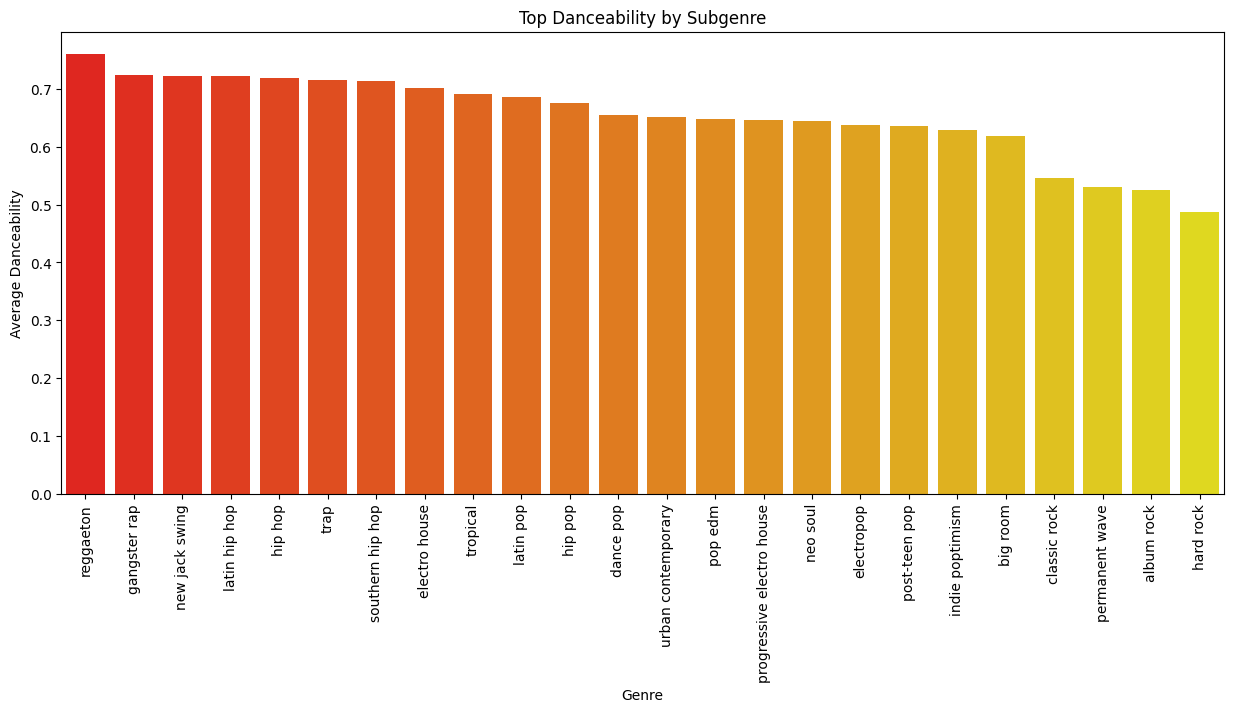

In [41]:
# Danceability by genre
genre_danceability = (
    df.groupby("playlist_subgenre")["danceability"].mean().sort_values(ascending=False)
)

plt.figure(figsize=(15, 6))
sns.barplot(x=genre_danceability.index, y=genre_danceability.values, palette="autumn")
plt.xlabel("Genre")
plt.ylabel("Average Danceability")
plt.title("Top Danceability by Subgenre")
plt.xticks(rotation=90)
plt.show()

### Danceability Distribution


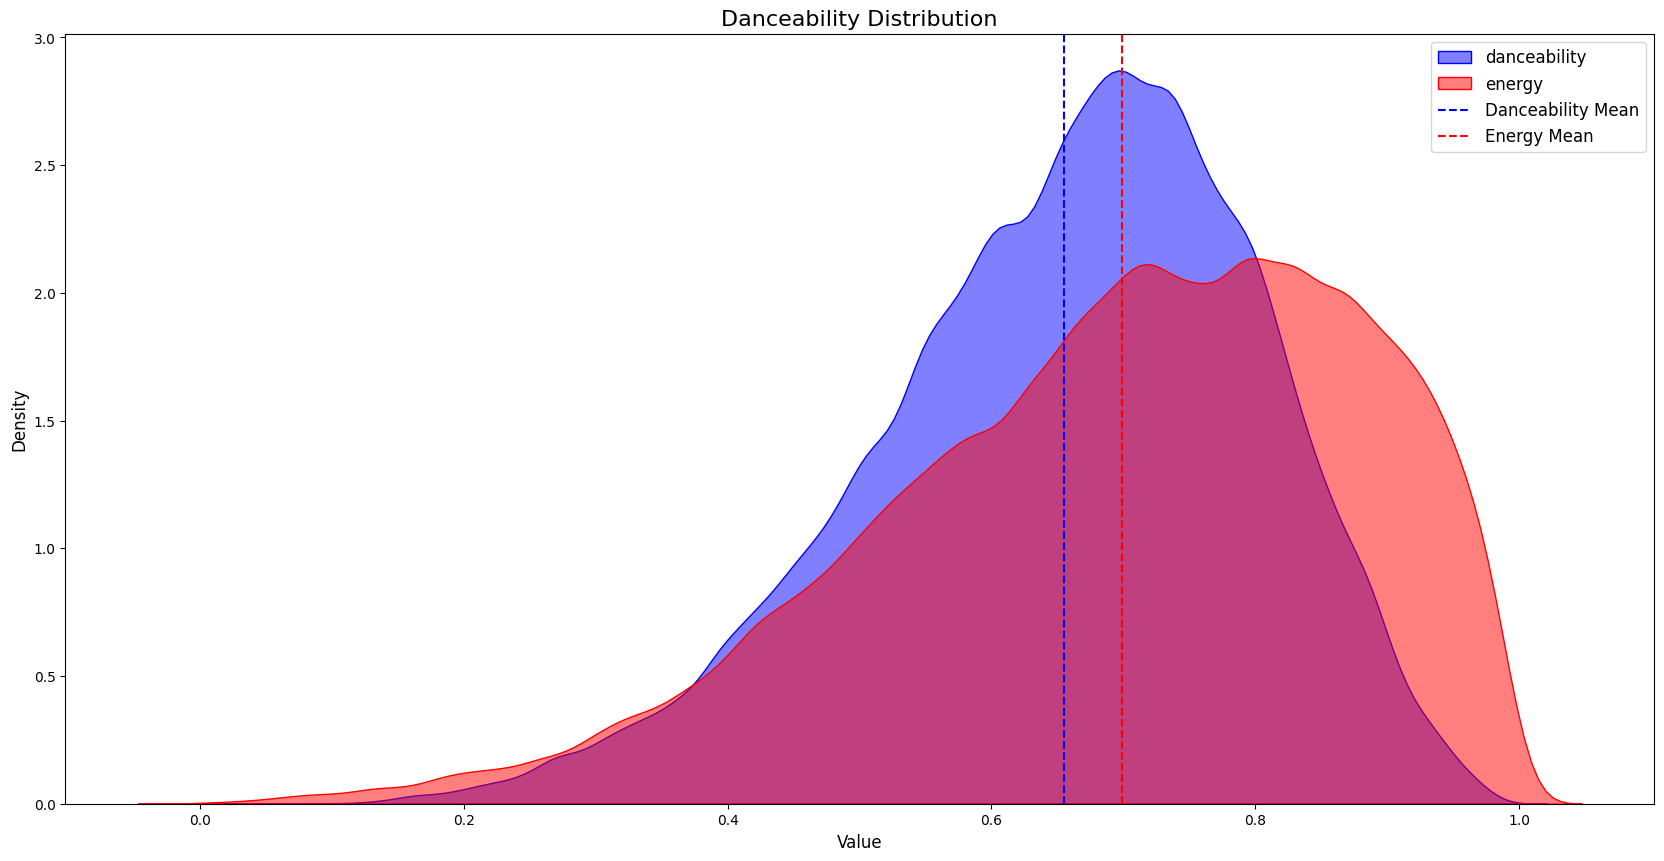

In [42]:
plt.figure(figsize=(20.5, 10))
sns.kdeplot(
    df["danceability"],
    fill=True,
    label="danceability",
    color="blue",
    alpha=0.5,
    bw_adjust=0.7,
)
sns.kdeplot(
    df["energy"], fill=True, label="energy", color="red", alpha=0.5, bw_adjust=0.7
)
plt.axvline(
    df["danceability"].mean(), color="blue", linestyle="--", label="Danceability Mean"
)
plt.axvline(df["energy"].mean(), color="red", linestyle="--", label="Energy Mean")
plt.title("Danceability Distribution", fontsize=16)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(fontsize=12)
plt.grid(False)
plt.show()

In [43]:
numerical_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
numerical_cols

['track_popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']

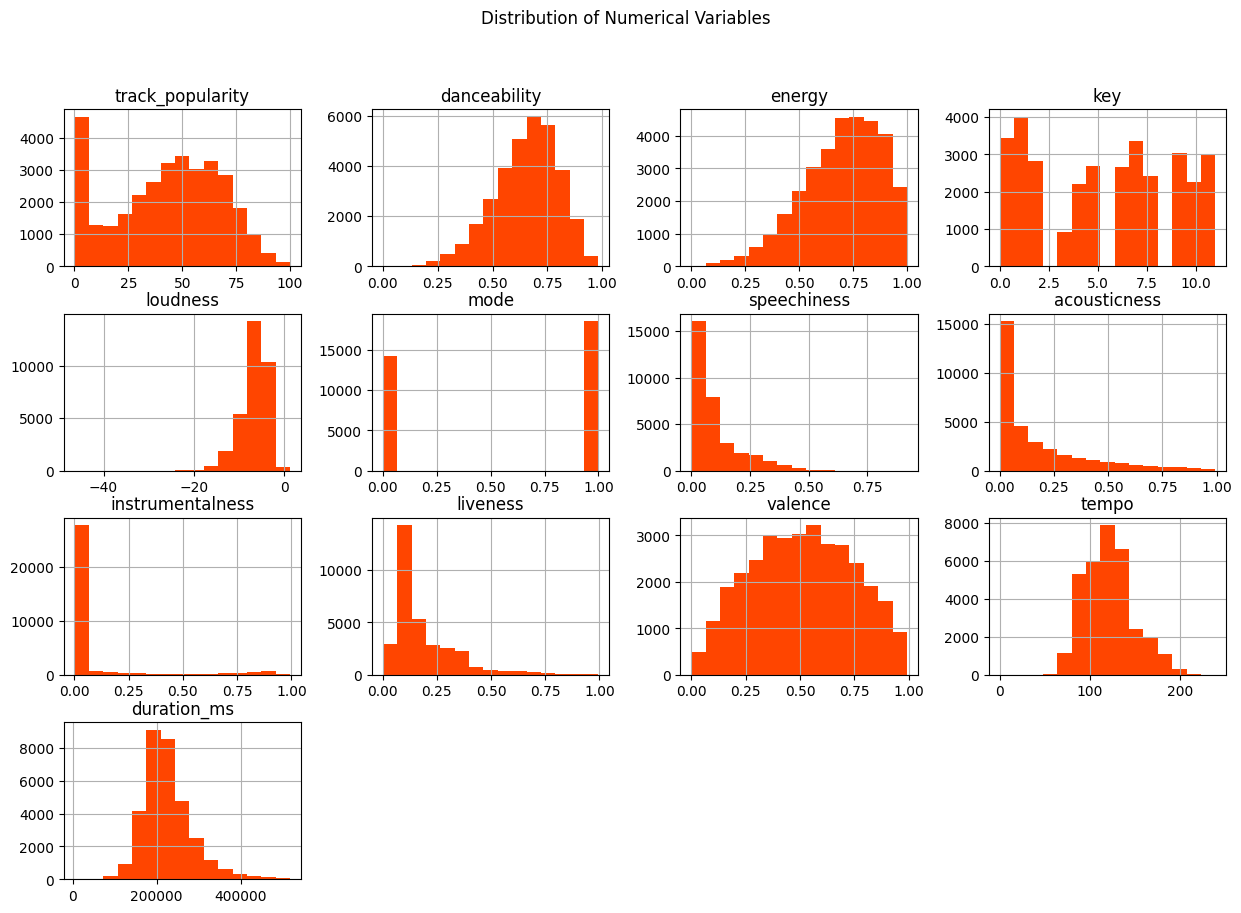

In [44]:
df[numerical_cols].hist(bins=15, figsize=(15, 10), color="orangered")
plt.suptitle("Distribution of Numerical Variables")
plt.show()

In [46]:
df.to_csv("../data/processed/01_songs_no_missing.csv", index=False)